## Titanic Dataset Problem

### Imports

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re

## Dataset

In [197]:
test_data_path = "data/test.csv"
train_data_path = "data/train.csv"
submission_data_path = "data/gender_submission.csv"

In [198]:
df_train = pd.read_csv(train_data_path)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Dataset Stats

In [199]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [200]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [201]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [202]:
m = df_train.shape[0]
print(m)
df_train.notna().sum()

891


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [203]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [204]:
age_bins = np.arange(0, 81, 10)
# age_bins = [0, 5, 12, 17, 22, 35, 45, 60, 80]
df_train["Age_Range"] = pd.cut(df_train.Age, bins=age_bins, include_lowest=1)

df_train.Age_Range.unique()

[(20.0, 30.0], (30.0, 40.0], NaN, (50.0, 60.0], (-0.001, 10.0], (10.0, 20.0], (60.0, 70.0], (40.0, 50.0], (70.0, 80.0]]
Categories (8, interval[float64, right]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, 70.0] < (70.0, 80.0]]

### Dataset Visualization

In [205]:
# Setting up visualisations
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(10,6), 
    'axes.facecolor': '#eee',
    'axes.grid': True,
    'grid.color': '.9',
    'axes.linewidth': 1.0,
    'grid.linestyle': u'-'},font_scale=1)
custom_colors = ["#3498db", "#95a5a6","#34495e", "#2ecc71", "#e74c3c"]
sns.set_palette(custom_colors)

Text(0.5, 1.0, 'Missing Val Heatmap')

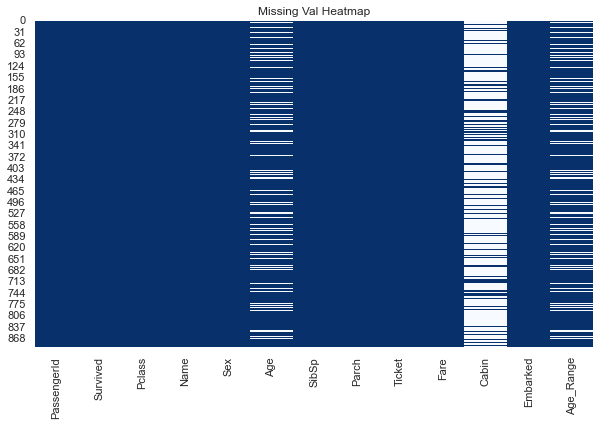

In [206]:
missing_val_heatmap = sns.heatmap(df_train.notna(), cbar=False, cmap="Blues")
missing_val_heatmap.set_title("Missing Val Heatmap")


Text(0.5, 1.0, 'Training Data - Ratio of Survival and Death')

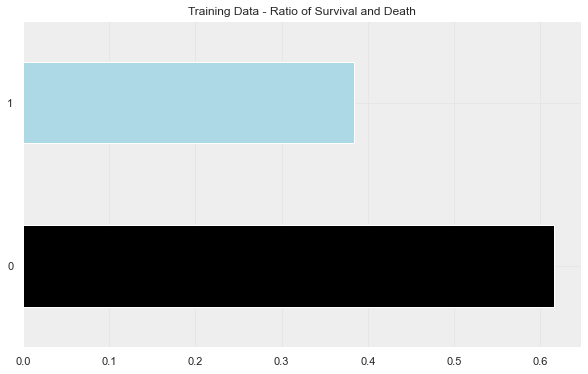

In [207]:
survival_ratio = df_train.Survived.value_counts(normalize=True)
survival_ratio.plot.barh(color=["black", "lightblue"])


plt.title("Training Data - Ratio of Survival and Death")

Text(0.5, 1.0, 'Training Data - People Traveling in different Classes')

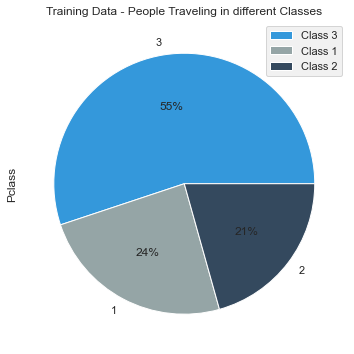

In [208]:
pclass_dist = df_train.Pclass.value_counts()
pclass_vals = np.sort(pclass_dist.index)
pclass_ratio = pclass_dist / m
pclass_ratio.plot.pie(autopct="%1.0f%%")

plt.legend(labels="Class " +  pclass_ratio.index.astype(str))
plt.title("Training Data - People Traveling in different Classes")

Text(0.5, 1.0, "'Training Data - Ratio of people survived as per class'")

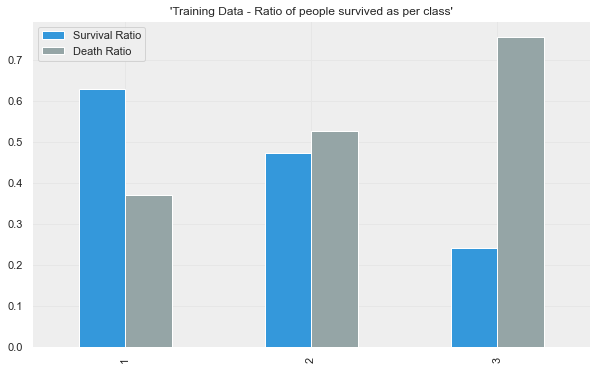

In [209]:
pclass_survival_dist = df_train[df_train.Survived==1].Pclass.value_counts()
pclass_death_dist = pclass_dist - pclass_survival_dist 

pclass_survival_ratio = pclass_survival_dist / pclass_dist
pclass_death_ratio = 1 - pclass_survival_ratio 

pclass_survival_ratio.name = "Survival Ratio"
pclass_death_ratio.name = "Death Ratio"

pclass_death_ratio_df = pd.concat(
    (pclass_survival_ratio, pclass_death_ratio), 
    axis=1
    )
pclass_death_ratio_df.plot.bar()

plt.title("'Training Data - Ratio of people survived as per class'")

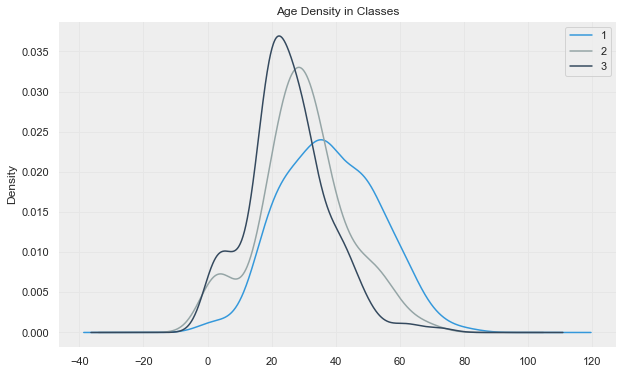

In [210]:
for pclass_val in pclass_vals:
    df_train.Age[df_train.Pclass == pclass_val].plot.density()

plt.title("Age Density in Classes")
plt.legend(pclass_vals)

plt.show()

In [211]:
sex_dist = df_train.Sex.value_counts()
sex_survival_dist = df_train[df_train.Survived==1].Sex.value_counts()
sex_death_dist = sex_dist - sex_survival_dist

sex_survival_status_dist = pd.DataFrame([sex_survival_dist / sex_dist, sex_death_dist / sex_dist], index=[1, 0])
sex_survival_status_dist

,female,male
1,0.742038,0.188908
0,0.257962,0.811092


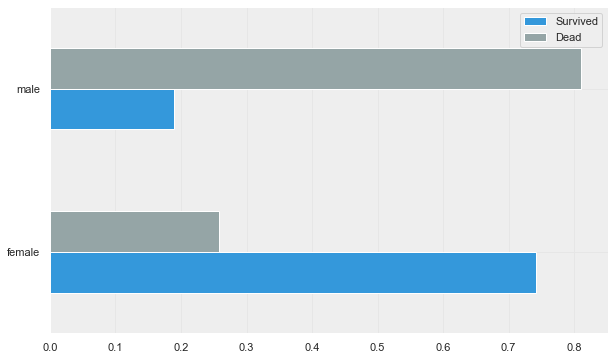

In [212]:
sex_survival_status_dist.T.plot.barh()
plt.legend(labels = ["Survived", "Dead"])

plt.show()

In [213]:
# td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid',
# sns.countplot(x = "Age_Range", hue = "Survived", data = td, palette=["C1", "C0"]).legend(labels = ["Deceased", "Survived"])

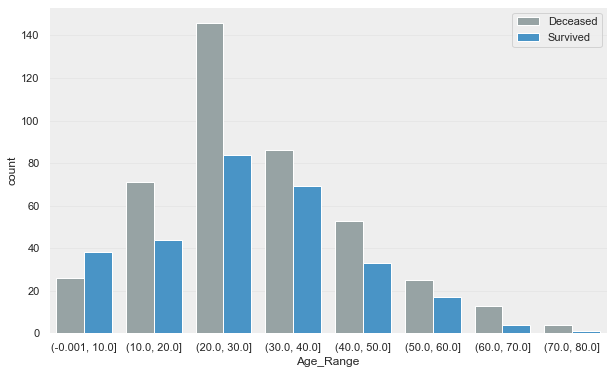

In [214]:
sns.countplot(x="Age_Range", data=df_train, hue="Survived", palette=["C1", "C0"])
plt.title("")
plt.legend(labels=["Deceased", "Survived"])


<AxesSubplot:>

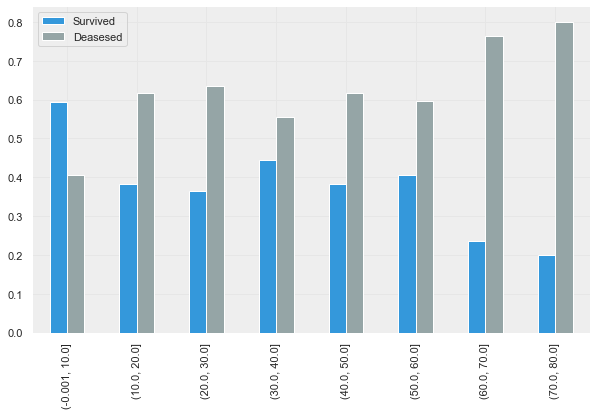

In [215]:
age_range_dist = df_train.Age_Range.value_counts().sort_index()

age_range_survival_dist = df_train[df_train.Survived==1].Age_Range.value_counts().sort_index()
age_range_death_dist = age_range_dist - age_range_survival_dist

age_range_survival_ratio = age_range_survival_dist / age_range_dist
age_range_death_ratio = 1 - age_range_survival_ratio

age_range_survival_status_df = pd.DataFrame([age_range_survival_ratio, age_range_death_ratio], index=["Survived", "Deasesed"]).T

age_range_survival_status_df.plot.bar()


Text(0.5, 1.0, "'Training Data - Ratio of people survived as per class'")

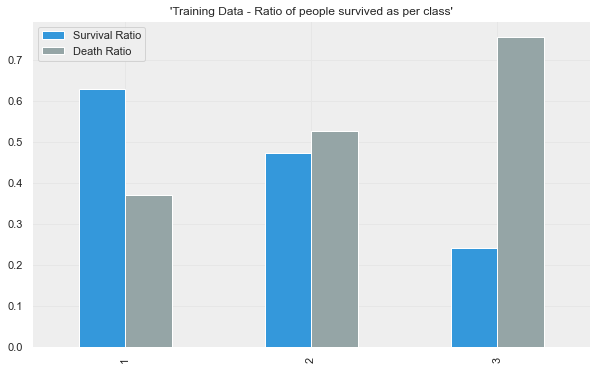

In [216]:
pclass_survival_dist = df_train[df_train.Survived==1].Pclass.value_counts()
pclass_death_dist = pclass_dist - pclass_survival_dist 

pclass_survival_ratio = pclass_survival_dist / pclass_dist
pclass_death_ratio = 1 - pclass_survival_ratio 

pclass_survival_ratio.name = "Survival Ratio"
pclass_death_ratio.name = "Death Ratio"

pclass_death_ratio_df = pd.concat(
    (pclass_survival_ratio, pclass_death_ratio), 
    axis=1
    )
pclass_death_ratio_df.plot.bar()

plt.title("'Training Data - Ratio of people survived as per class'")

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


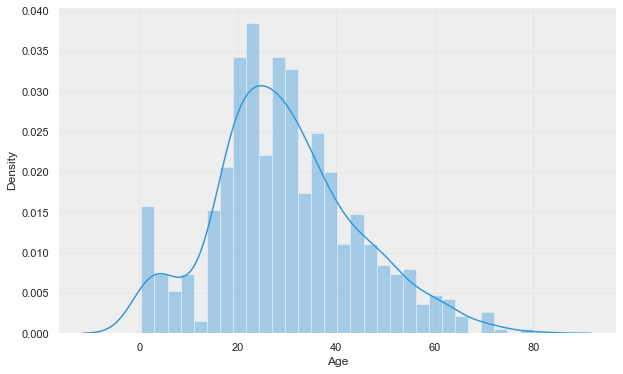

In [217]:
a = sns.distplot(df_train.Age, bins=30)

In [218]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Range'],
      dtype='object')

In [219]:
# fms = df_train[["Survived", "SibSp", "Parch"]]
fms = df_train.loc[:, ["Survived", "SibSp", "Parch"]]
fms["Fam"] = fms.SibSp + fms.Parch

fms.head()

,Survived,SibSp,Parch,Fam
0,0,1,0,1
1,1,1,0,1
2,1,0,0,0
3,1,1,0,1
4,0,0,0,0


<AxesSubplot:xlabel='SibSp', ylabel='count'>

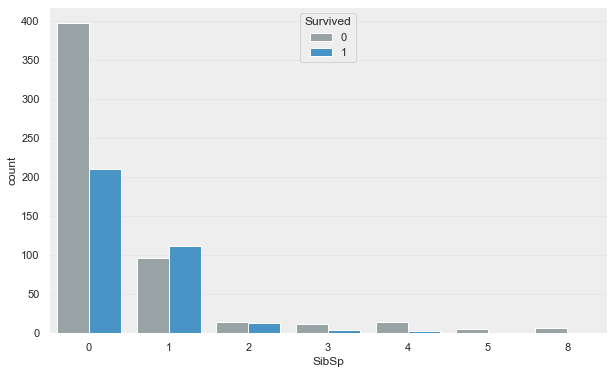

In [220]:
sns.countplot(x="SibSp", data=df_train, hue="Survived", palette=["C1", "C0"])

<AxesSubplot:xlabel='Parch', ylabel='count'>

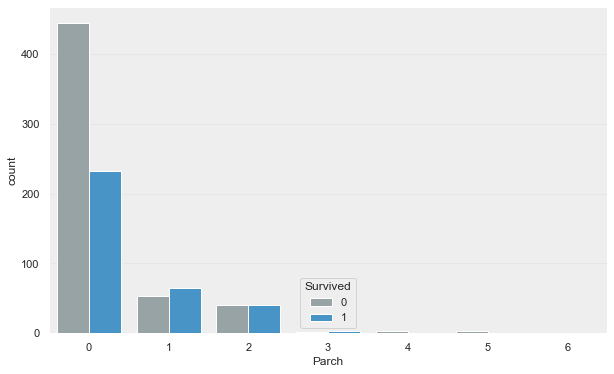

In [221]:
sns.countplot(x="Parch", data=df_train, hue="Survived", palette=["C1", "C0"])

<AxesSubplot:xlabel='Fam', ylabel='count'>

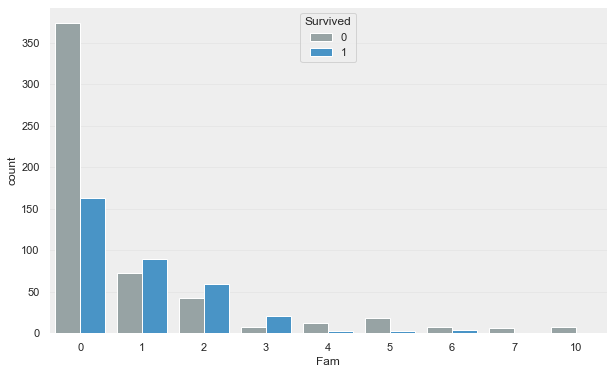

In [222]:
sns.countplot(x="Fam", data=fms, hue="Survived", palette=["C1", "C0"])

In [223]:
fms.Fam.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Fam, dtype: int64

In [224]:
fam_dist = fms.Fam.value_counts().sort_index()

fam_survival_dist = fms[fms.Survived==1].Fam.value_counts().sort_index()
fam_death_dist = (fam_dist - fam_survival_dist).fillna(0)

fam_survival_ratio = (fam_survival_dist / fam_dist).fillna(0)
fam_death_ratio = 1 - fam_survival_ratio

fam_survival_status_df = pd.DataFrame([fam_survival_ratio, fam_death_ratio], index=[1, 0]).T

fam_survival_status_df

,1,0
0,0.303538,0.696462
1,0.552795,0.447205
2,0.578431,0.421569
3,0.724138,0.275862
4,0.200000,0.800000
5,0.136364,0.863636
6,0.333333,0.666667
7,0.000000,1.000000
10,0.000000,1.000000


In [225]:
pd.concat([fam_survival_ratio, fam_death_ratio], axis=1)

,Fam,Fam
0,0.303538,0.696462
1,0.552795,0.447205
2,0.578431,0.421569
3,0.724138,0.275862
4,0.200000,0.800000
5,0.136364,0.863636
6,0.333333,0.666667
7,0.000000,1.000000
10,0.000000,1.000000


[Text(0, 0, 'SA'), Text(1, 0, 'CE'), Text(2, 0, 'QT')]

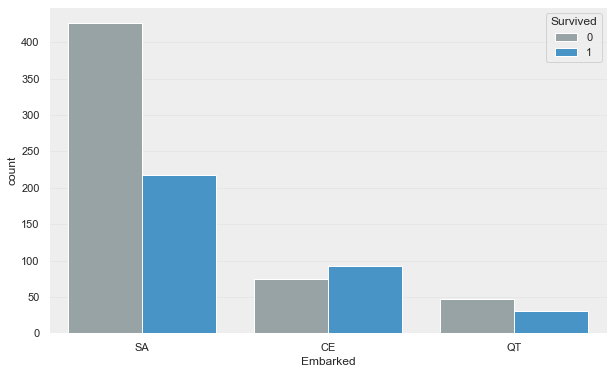

In [226]:
emb_plt = sns.countplot(x="Embarked", data=df_train, hue="Survived", palette=["C1", "C0"])
emb_plt.set_xticklabels(["SA", "CE", "QT"])

In [227]:
df_train[df_train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,"(30.0, 40.0]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,"(60.0, 70.0]"


In [228]:
df_train[(df_train.Pclass==1) & (df_train.Sex=="female")].Embarked.value_counts()

S    48
C    43
Q     1
Name: Embarked, dtype: int64

In [229]:
df_train.Embarked.mode()[0]

'S'

In [230]:
df_train.Embarked = df_train.Embarked.fillna(df_train.Embarked.mode()[0])
df_train[df_train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range


In [231]:
df_train["Title"] = df_train.Name.apply(lambda name : name.split(",")[1].split(".")[0].strip())
print(df_train["Title"].unique())

df_train[df_train.Sex=="female"].Title.value_counts()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


Miss            182
Mrs             125
Mlle              2
Mme               1
Ms                1
Lady              1
the Countess      1
Dr                1
Name: Title, dtype: int64

In [232]:
df_train["Title"].nunique()

17

In [233]:
grp = df_train.groupby(["Sex", "Pclass"])
grp1 = df_train.groupby(["Sex", "Pclass", "Title"])

grp.Age.apply(lambda x: x.fillna(x.median()))

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

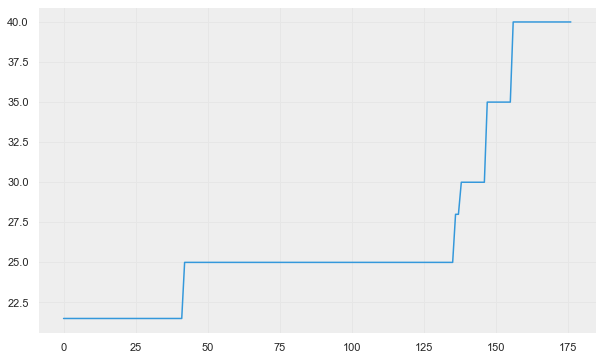

In [234]:
grp.Age.apply(lambda x: x.fillna(x.median()))[df_train.Age.isna()].sort_values().reset_index().Age.plot()

<AxesSubplot:>

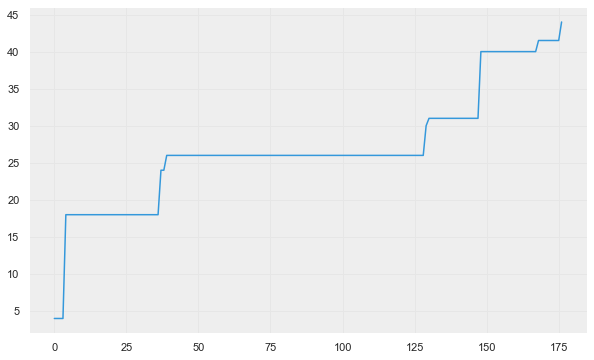

In [235]:
grp1.Age.apply(lambda x: x.fillna(x.median()))[df_train.Age.isna()].sort_values().reset_index().Age.plot()

<AxesSubplot:xlabel='Age', ylabel='Density'>

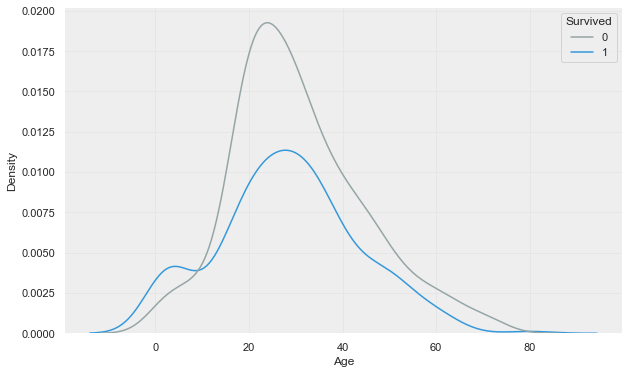

In [236]:
sns.kdeplot(data=df_train, x="Age", hue="Survived", palette=["C1", "C0"])

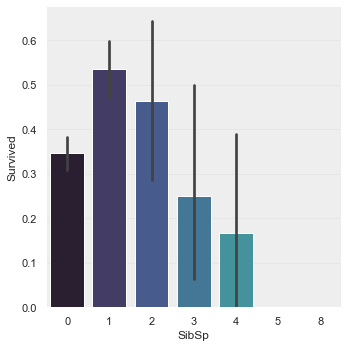

In [237]:
sns.catplot(x = 'SibSp', y = 'Survived', data = df_train, kind = 'bar', palette='mako')


In [238]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Range', 'Title'],
      dtype='object')

In [239]:
age     = df_train.Age
fare    = df_train.Fare
survive = df_train.Survived
pclass  = df_train.Pclass
embarked  = df_train.Embarked
sex = df_train.Sex


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

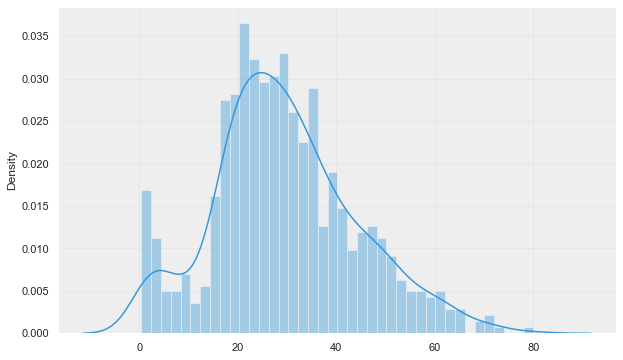

In [240]:
sns.distplot(x=df_train.Age, bins=40)

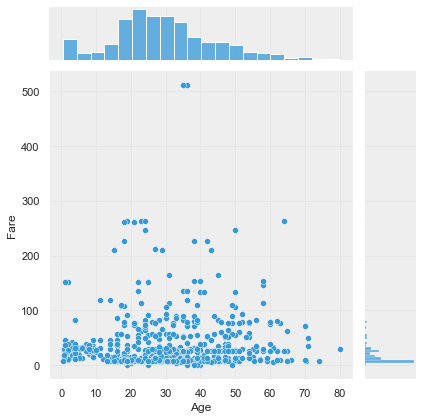

In [241]:
sns.jointplot(x=age, y=fare)

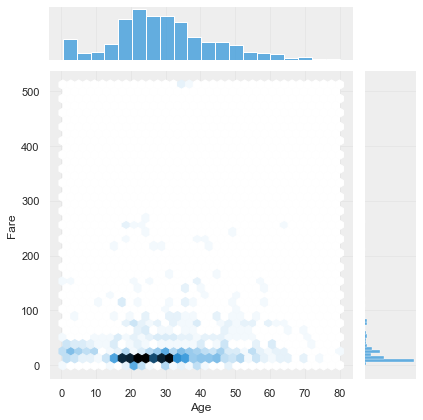

In [242]:
sns.jointplot(x=age, y=fare, kind="hex")

In [243]:
d = pd.read_csv(train_data_path)[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

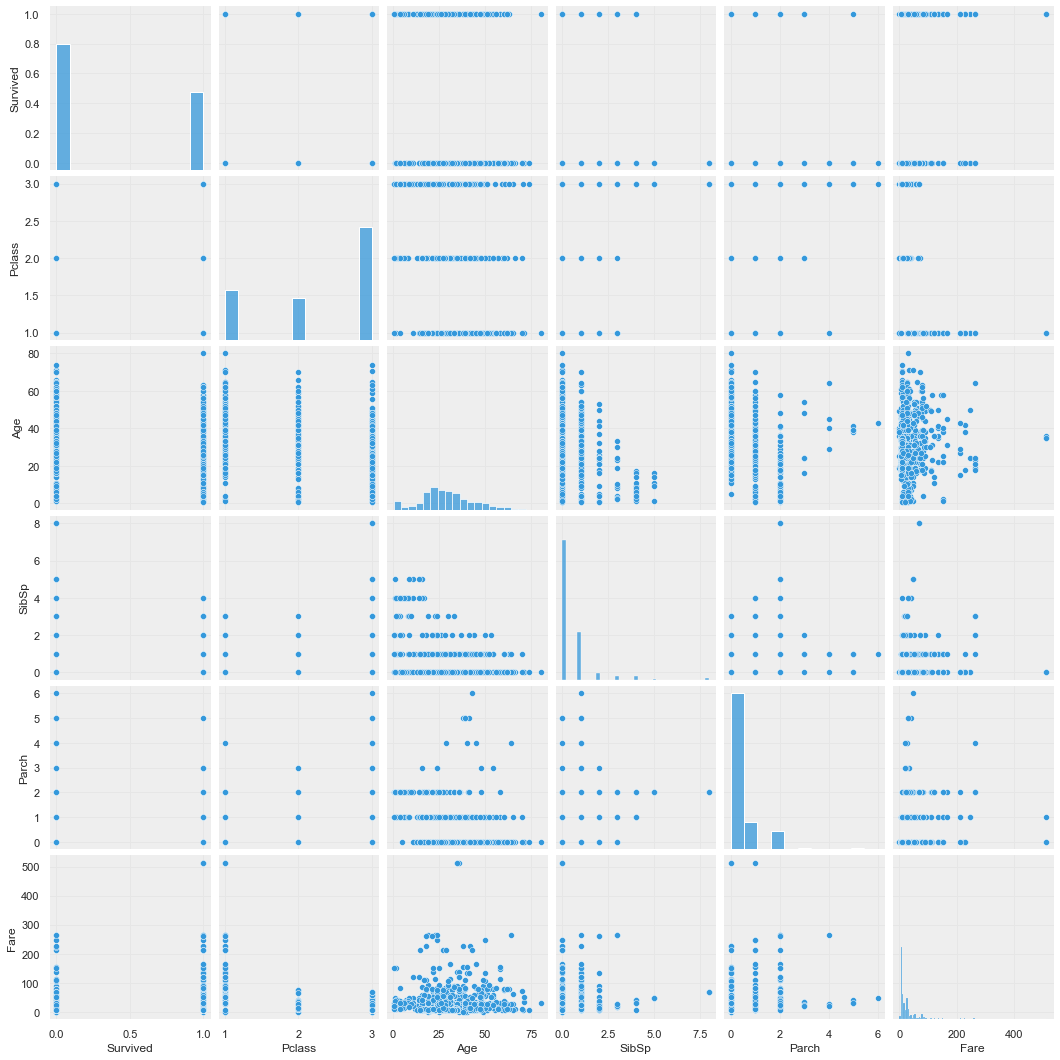

In [244]:
sns.pairplot(d)


<AxesSubplot:xlabel='Pclass', ylabel='Pclass'>

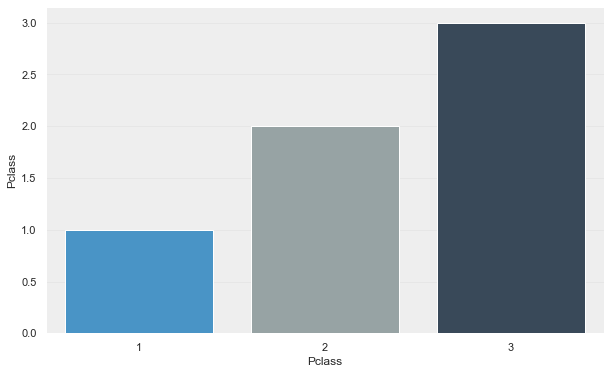

In [245]:
sns.barplot(x="Pclass", data=d, y=pclass)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

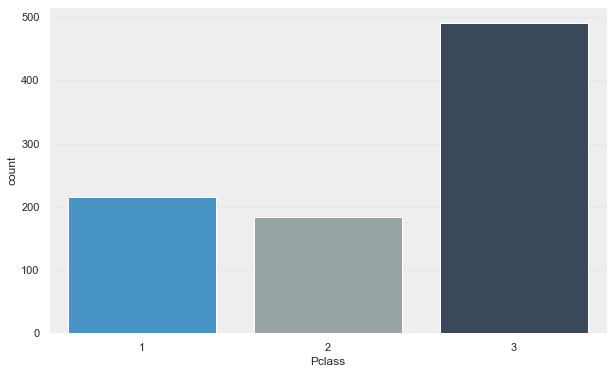

In [246]:
sns.countplot(d['Pclass'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

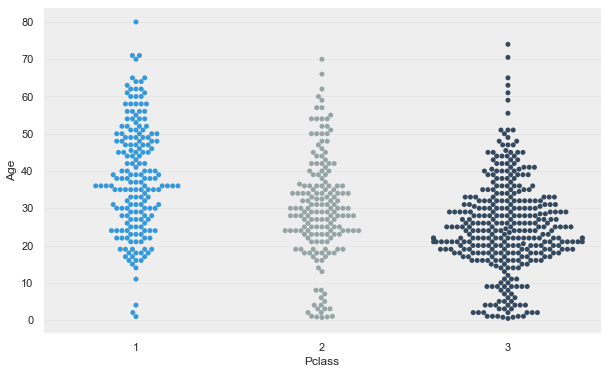

In [247]:
sns.swarmplot(y = d['Age'], x = d['Pclass'])


<AxesSubplot:>

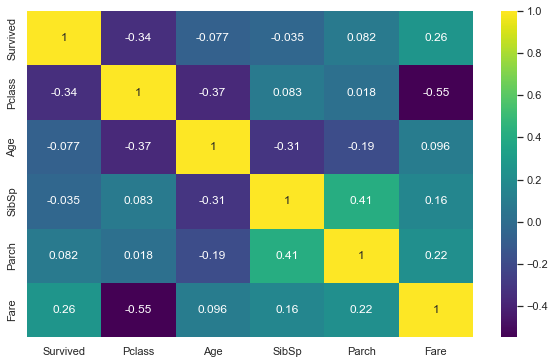

In [248]:
sns.heatmap(d.corr(), annot = True, cmap = 'viridis')


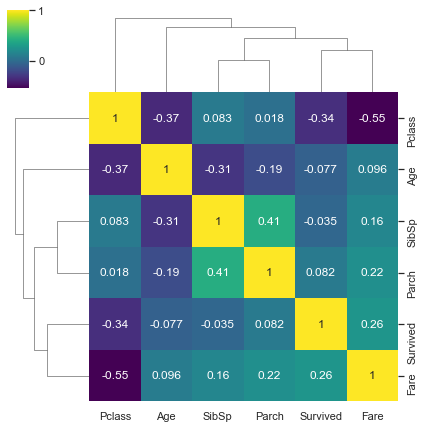

In [249]:
sns.clustermap(d.corr(), annot=True,cmap='viridis', figsize=(6,6))


In [250]:
mask = np.triu(np.ones_like(df_train.corr(method = "pearson"), dtype=np.bool))


/var/folders/10/d1l6p8_s53q1w912xq9jh2_80000gn/T/ipykernel_63057/2523423747.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train.corr(method = "pearson"), dtype=np.bool))


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

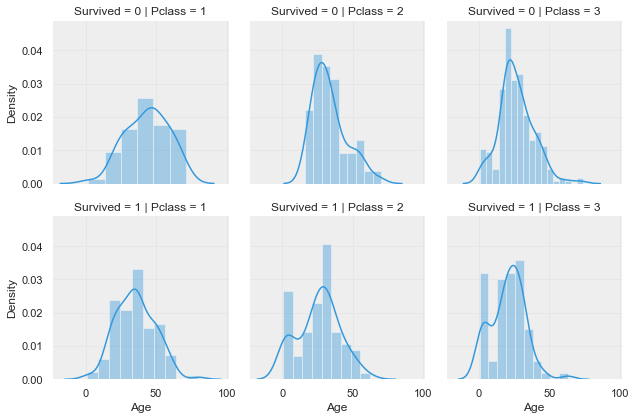

In [251]:
sns.FacetGrid(df_train, col = 'Pclass', row = 'Survived').map(sns.distplot, 'Age')


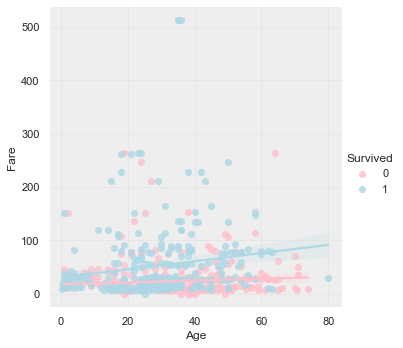

In [252]:
sns.lmplot(x = 'Age', y = 'Fare', data = d, hue = 'Survived', palette=["pink", "lightblue"])



<Figure size 720x432 with 0 Axes>

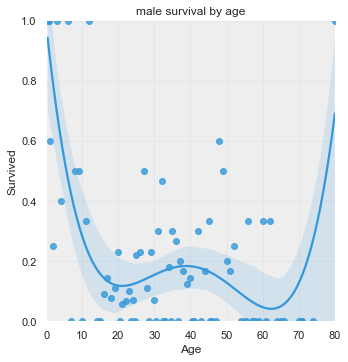

<Figure size 720x432 with 0 Axes>

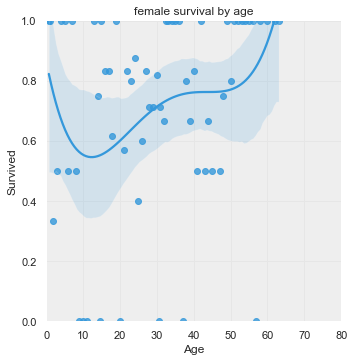

In [253]:
train_with_age = df_train[ ~np.isnan(df_train["Age"]) ]
survivalpc_by_age = train_with_age.groupby(["Sex","Age"], as_index = False)["Survived"].mean()


for gender in ["male", "female"]:
    plt.figure()
    sns.lmplot(data=survivalpc_by_age[survivalpc_by_age["Sex"]==gender], x="Age", y="Survived", order=4)
    plt.title("%s survival by age" % gender)
    plt.xlim(0, 80)
    plt.ylim(0, 1)

In [1]:
1

1

In [254]:
p = .73
r = .77

In [255]:
2 * (r * p) / (
     r + p 
)

0.7494666666666667

In [256]:
m = 1           # False Pos
n = 5           # False Neg
s = m+n

(1) * 2 * ((m/s)*p * (n/s)*r) / (
         (m/s)*p + (n/s)*r 
)

0.20454876273653563

In [257]:
m = 1           # False Pos
n = 1           # False Neg
s = m+n

(p * m + r * n) / s

0.75

In [258]:
def score(p, r, m = 1, n = 1):
    
    return (p * m + r * n) / (m + n)
m = 6
n = 1

score(.75, .75, m, n), score(.73, .75, m, n), score(.73, .77, m, n), score(.75, .70, m, n), score(.74, .72, m, n), score(.73, .71, m, n)

(0.75,
 0.7328571428571429,
 0.7357142857142858,
 0.7428571428571429,
 0.737142857142857,
 0.7271428571428571)

In [ ]:
1, 4, 3, 5, 2, 6

(1, 4, 3, 5, 2, 6)

In [261]:
score(.75, .75, 4, 1), score(.73, .75, 4, 1), score(.73, .77, 4, 1), score(.75, .70, 4, 1), score(.74, .72, 4, 1), score(.73, .71, 4, 1)


(0.75, 0.734, 0.738, 0.74, 0.736, 0.726)

In [262]:
df_train[df_train.Age.isna()].Title.value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Title, dtype: int64

In [263]:
df_train[df_train.Title=="Dr"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Range,Title
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,"(40.0, 50.0]",Dr
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,"(50.0, 60.0]",Dr
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,"(20.0, 30.0]",Dr
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,"(30.0, 40.0]",Dr
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,"(40.0, 50.0]",Dr
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,Dr
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,"(40.0, 50.0]",Dr


In [264]:
df_train.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64